## 我们将要涵盖的内容

在本模块中，我们将介绍一个标准的PyTorch工作流程（可以根据需要进行调整，但它涵盖了主要的步骤概述）。

<img src="./images/01_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

目前，我们将使用这个工作流程来预测一条简单的直线，但工作流程的步骤可以根据你所处理的问题进行重复和修改。

具体来说，我们将涵盖：

| **主题** | **内容** |
| ----- | ----- |
| **1. 准备数据** | 数据几乎可以是任何东西，但为了入门，我们将创建一条简单的直线 |
| **2. 构建模型** | 在这里，我们将创建一个模型来学习数据中的模式，我们还将选择一个**损失函数**、**优化器**并构建一个**训练循环**。 |
| **3. 使模型拟合数据（训练）** | 我们有了数据和模型，现在让我们让模型（尝试）在（**训练**）数据中找到模式。 |
| **4. 进行预测和评估模型（推理）** | 我们的模型已经在数据中找到了模式，让我们将其发现与实际的（**测试**）数据进行比较。 |
| **5. 保存和加载模型** | 你可能想在其他地方使用你的模型，或者稍后再回来使用它，这里我们将介绍这一点。 |
| **6. 将所有内容整合起来** | 让我们把以上所有内容结合起来。 |

现在让我们导入本模块所需的内容。

我们将获取`torch`、`torch.nn`（`nn`代表神经网络，这个包包含在PyTorch中创建神经网络的构建块）和`matplotlib`。

In [1]:
import torch
# nn contains all of PyTorch's building blocks for neural networks
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.1+cu121'

## 1. 数据（准备与加载）

我想强调的是，机器学习中的“数据”几乎可以是你能想象到的任何东西。比如一表格的数字（像一个大型Excel电子表格）、任何类型的图像、视频（YouTube上有大量数据！）、音频文件（如歌曲或播客）、蛋白质结构、文本等等。

<img src="./images/01_data_preparing_and_loading.png" width=900 alt="preparing and loading data"/>

机器学习分为两个部分：
1. 无论你的数据是什么，都将其转化为数字（一种表示形式）。
2. 选择或构建一个模型，以尽可能好地学习这种表示形式。

有时这两部分可以同时进行。

但如果你没有数据呢？

嗯，这就是我们现在所处的情况。

没有数据。

但我们可以创建一些数据。

让我们把数据创建成一条直线。

我们将使用[线性回归](https://en.wikipedia.org/wiki/Linear_regression)来创建具有已知**参数**（模型可以学习的内容）的数据，然后我们将使用PyTorch看看能否构建模型，通过[**梯度下降**](https://en.wikipedia.org/wiki/Gradient_descent).

如果上面的术语现在对你来说没什么意义，也不用担心，我们会在实际应用中遇到它们，而且我会在下面提供额外的资源，供你进一步学习。

In [2]:
# 先创建出确定的参数
weight = 0.7
bias = 0.3

# 接下来我们创建一条直线
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### 将数据拆分为训练集和测试集

我们有一些数据。

但在构建模型之前，我们需要对其进行拆分。

机器学习项目中最重要的步骤之一是创建训练集和测试集（必要时还会创建验证集）。

数据集的每一种拆分都有特定的用途：

| 拆分 | 用途 | 占总数据的比例 | 使用频率 |
| ----- | ----- | ----- | ----- |
| **训练集** | 模型从该数据中学习（就像你在学期中学习的课程材料）。 | ~60-80% | 始终使用 |
| **验证集** | 模型在该数据上进行调优（就像你在期末考试前参加的模拟考试）。 | ~10-20% | 经常使用但并非总是使用 |
| **测试集** | 模型在该数据上进行评估，以检验其学到的内容（就像你在学期末参加的期末考试）。 | ~10-20% | 始终使用 |

目前，我们只使用训练集和测试集，这意味着我们将有一个供模型学习的数据集和一个供模型评估的数据集。

我们可以通过拆分`X`和`y`张量来创建它们。

> **注意：** 在处理现实世界的数据时，这一步通常在项目一开始就进行（测试集应始终与所有其他数据分开）。我们希望模型从训练数据中学习，然后在测试数据上进行评估，以了解它对未见过的样本的**泛化**能力如何。

In [3]:
# 创建训练集与测试集划分
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

太棒了，我们有40个样本用于训练（`X_train`和`y_train`），10个样本用于测试（`X_test`和`y_test`）。

我们创建的模型将尝试学习`X_train`和`y_train`之间的关系，然后我们会在`X_test`和`y_test`上评估它学到的内容。

但现在我们的数据还只是纸上的数字。

让我们创建一个函数来可视化它。

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    绘制训练数据、测试数据并比较预测结果。
    """
    plt.figure(figsize=(10, 7))
    # 用蓝色绘制训练数据
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # 用绿色绘制测试数据
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # 用红色绘制预测结果（这些预测是基于测试数据做出的）
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # 显示图例
    plt.legend(prop={"size": 14})

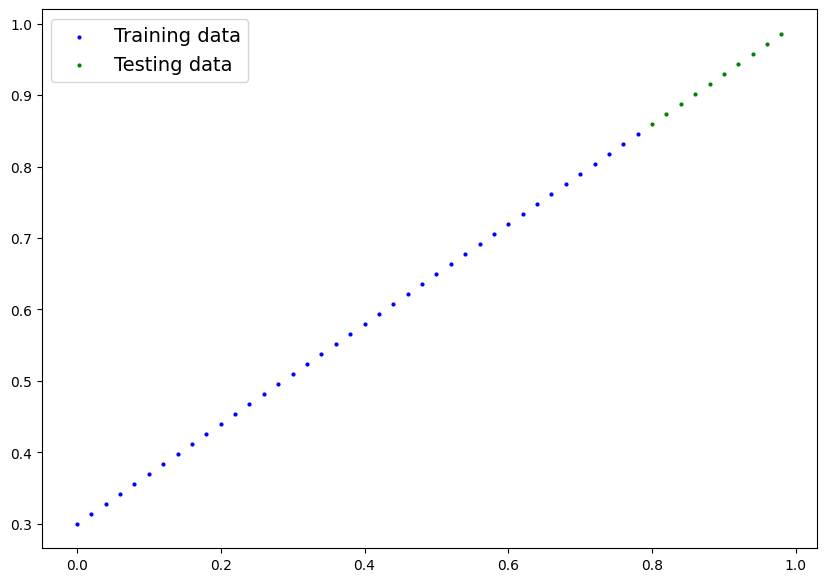

In [5]:
plot_predictions()

太厉害了！

现在，我们的数据不再只是页面上的数字，而是一条直线。

> **注意：** 现在是时候向你介绍数据探索者的座右铭了……“可视化，可视化，再可视化！”
>
> 每当你处理数据并将其转化为数字时，请想想这句话，如果你能将某些东西可视化，这会为理解带来意想不到的效果。
>
> 机器喜欢数字，我们人类也喜欢数字，但我们也喜欢看图。

## 2. 构建模型

现在我们有了一些数据，让我们构建一个模型，用蓝点来预测绿点。

我们这就直接开始。

我们会先编写代码，然后再解释所有内容。

让我们使用纯PyTorch来复现一个标准的线性回归模型。

In [22]:
# 构建一个线性回归模型类
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 创建一个维度为1，类型为float32，并允许梯度更新的权重weights
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)
        # 创建一个维度为1，类型为float32，并允许梯度更新的偏置bias
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                 requires_grad=True)

    # 定义模型的前向传播
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch 模型构建核心组件

PyTorch 提供了（大约）四个核心模块，借助这些模块，你几乎可以创建出任何你能想象到的神经网络。

它们分别是 [`torch.nn`](https://pytorch.org/docs/stable/nn.html)、[`torch.optim`](https://pytorch.org/docs/stable/optim.html)、[`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) 和 [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html)。目前，我们将重点介绍前两个模块，后两个模块会在之后讲解（不过你或许能猜到它们的作用）。

| PyTorch 模块 | 功能描述 |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | 包含计算图的所有构建块（本质上是一系列按特定方式执行的计算）。 |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | 存储可与 `nn.Module` 配合使用的张量。若设置 `requires_grad=True`，梯度（用于通过[**梯度下降**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)更新模型参数）会自动计算，这一过程通常被称为“自动求导（autograd）”。 | 
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | 所有神经网络模块的基类，神经网络的所有构建块都是它的子类。如果要在 PyTorch 中构建神经网络，你的模型应当继承 `nn.Module`。该类要求必须实现 `forward()` 方法。 | 
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | 包含多种优化算法（这些算法会告知存储在 `nn.Parameter` 中的模型参数，应如何优化调整以改进梯度下降效果，进而减少损失）。 | 
| `def forward()` | 所有 `nn.Module` 子类都必须实现 `forward()` 方法，该方法定义了在传入特定 `nn.Module` 的数据上将要执行的计算（例如上述的线性回归公式）。 |

如果上述内容听起来较为复杂，可以这样理解：PyTorch 神经网络中的几乎所有组件都源自 `torch.nn`，具体如下：
* `nn.Module` 包含更大型的构建块（即网络层）
* `nn.Parameter` 包含权重、偏置等小型参数（将这些参数组合起来可构成 `nn.Module`）
* `forward()` 方法用于定义大型构建块（即 `nn.Module` 内部）如何对输入数据（充满数据的张量）进行计算
* `torch.optim` 包含各类优化方法，用于指导如何改进 `nn.Parameter` 中的参数，使其能更好地拟合输入数据

*通过继承 `nn.Module` 构建 PyTorch 模型的基本组件。对于继承 `nn.Module` 的对象，必须定义 `forward()` 方法。*

> **参考资源**：有关这些核心模块及其应用场景的更多信息，请参阅 [PyTorch 速查表](https://pytorch.org/tutorials/beginner/ptcheat.html)。

### 查看PyTorch模型的内容
现在我们已经解决了这些问题，让我们用我们创建的类来实例化一个模型，并使用[`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters)来检查它的参数。

In [26]:
# 固定随机种子
torch.manual_seed(42)
# 创建模型实例
model_0 = LinearRegressionModel()
# 检查参数
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

我们还可以使用[`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict)来获取模型的状态（即模型所包含的内容）。

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

注意`model_0.state_dict()`中的`weights`和`bias`值是如何以随机浮点张量的形式呈现的吗？

这是因为我们在上面使用`torch.randn()`对它们进行了初始化。

本质上，我们希望从随机参数开始，让模型更新这些参数，使其朝着最适合我们数据的参数方向变化（也就是我们在创建直线数据时设置的硬编码`weight`和`bias`值）。

### 使用`torch.inference_mode()`进行预测
为了验证这一点，我们可以将测试数据`X_test`传入模型，看看它对`y_test`的预测有多接近。

当我们将数据传入模型时，数据会经过模型的`forward()`方法，并使用我们定义的计算过程生成结果。

让我们来做一些预测吧。

In [9]:
# 使用模型进行预测
with torch.inference_mode():
    y_preds = model_0(X_test)

嗯？

你可能已经注意到，我们使用了[`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html)作为[上下文管理器](https://realpython.com/python-with-statement/)（也就是`with torch.inference_mode():`这部分）来进行预测。

顾名思义，`torch.inference_mode()`用于使用模型进行推理（做出预测）的时候。

`torch.inference_mode()`会关闭一系列功能（比如梯度跟踪，这在训练时是必要的，但在推理时则不需要），从而加快**前向传播**（数据通过`forward()`方法的过程）的速度。

> **注意：** 在较早的PyTorch代码中，你可能会看到`torch.no_grad()`被用于推理。虽然`torch.inference_mode()`和`torch.no_grad()`的作用类似，但`torch.inference_mode()`是较新的，可能速度更快，因此更受青睐。更多信息可以查看PyTorch的这条[推文](https://

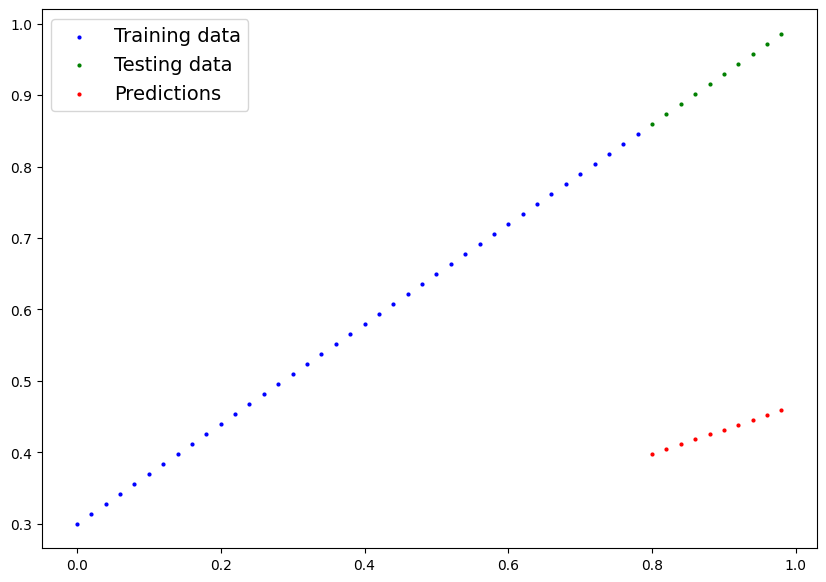

In [10]:
# 我们将测试结果放到图像上进行观测
plot_predictions(predictions=y_preds)

In [11]:
# 预测结果和测试集真实值之间的偏差还是很大的
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3. 训练模型

目前，我们的模型是使用随机参数进行计算来做出预测的，本质上就是在（随机地）猜测。

为了解决这个问题，我们可以更新其内部参数（我也将*参数*称为模式），也就是我们使用`nn.Parameter()`和`torch.randn()`随机设置的`权重`和`偏置`值，使其能更好地表示数据。

我们本可以硬编码这些参数（因为我们知道默认值是`weight=0.7`和`bias=0.3`），但那样做还有什么乐趣呢？

很多时候，你并不知道一个模型的理想参数是什么。

相反，编写代码看看模型能否自己尝试找出这些参数，会有趣得多。

### 在PyTorch中创建损失函数与优化器

要让模型能够自主更新参数，我们还需要在“配方”中添加几个关键组件——即**损失函数**（loss function）和**优化器**（optimizer）。

它们的具体作用如下表所示：

| 函数（Function） | 功能描述（What does it do?） | 在PyTorch中的位置（Where does it live in PyTorch?） | 常见类型（Common values） |
| ----- | ----- | ----- | ----- |
| **损失函数** | 衡量模型预测结果（如 `y_preds`）与真实标签（如 `y_test`）之间的误差，误差值越小越好。 | PyTorch在 [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions) 模块中提供了大量内置损失函数。 | - 回归问题：平均绝对误差（MAE），对应函数 [`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)。<br>- 二分类问题：二元交叉熵（Binary Cross Entropy），对应函数 [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)。 |
| **优化器** | 指导模型如何更新内部参数，以最大限度降低损失函数计算出的误差。 | 各类优化函数的实现可在 [`torch.optim`](https://pytorch.org/docs/stable/optim.html) 模块中找到。 | - 随机梯度下降（Stochastic Gradient Descent, SGD），对应函数 [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)。<br>- Adam优化器，对应函数 [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)。 |


接下来，我们将创建一个损失函数和一个优化器，用于改进我们的模型。

选择何种损失函数与优化器，取决于你所解决的问题类型。不过，有一些经实践验证效果较好的常用组合：例如优化器可选用SGD（随机梯度下降）或Adam；损失函数方面，回归问题（预测数值）常用MAE（平均绝对误差），分类问题（预测类别归属）常用二元交叉熵。

针对我们当前的问题（预测数值），我们选择PyTorch中的MAE作为损失函数，其对应实现为 `torch.nn.L1Loss()`。

<img src="./images/01-mae-loss-annotated.png" width=900 alt="我们的绘图数据对应的MAE损失示意图"/>

*平均绝对误差（MAE，在PyTorch中对应 `torch.nn.L1Loss`）的计算逻辑：先求预测值与标签值（两点）之间的绝对差值，再对所有样本的绝对差值取平均值。*


优化器方面，我们将使用SGD，对应函数为 `torch.optim.SGD(params, lr)`，其中参数含义如下：
- `params`：需要优化的目标模型参数（例如我们之前随机初始化的 `weights`（权重）和 `bias`（偏置））。
- `lr`：**学习率**（learning rate），用于控制优化器更新参数的步长。学习率越大，优化器的参数更新步长越大（步长过大可能导致优化失败）；学习率越小，更新步长越小（步长过小可能导致优化器需要极长时间才能找到最优参数）。学习率属于**超参数**（hyperparameter），需由机器学习工程师手动设置。常见的初始学习率取值为 `0.01`、`0.001`、`0.0001`，此外也可通过动态调整学习率（即“学习率调度”，参考[learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)）进一步优化。


以上内容涉及的概念较多，下面我们通过代码来直观理解它们的用法。

In [27]:
# 创建一个loss函数
loss_fn = nn.L1Loss()
# 创建一个优化器
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### 在PyTorch中创建优化循环

太棒了！现在我们已经有了损失函数和优化器，接下来就该创建**训练循环**（training loop）和**测试循环**（testing loop）了。

训练循环的核心是让模型遍历训练数据，学习`特征`（features）与`标签`（labels）之间的关联关系。

测试循环则是让模型遍历测试数据，评估其在训练数据上学到的模式效果如何（注意：模型在训练过程中绝不会接触到测试数据）。

这两者都被称为“循环”，因为我们需要让模型逐一样本地遍历（循环访问）数据集中的每个样本。

为了实现这些循环，我们将编写一个Python `for`循环，其设计思路参考了《非官方PyTorch优化循环之歌》（相关推文见[此处](https://twitter.com/mrdbourke/status/1450977868406673410?s=20)，另有[视频版本](https://youtu.be/Nutpusq_AFw)可供观看）。

<img src="./images/01-pytorch-optimization-loop-song.png" width=900 alt="非官方PyTorch优化循环之歌"/>
*《非官方PyTorch优化循环之歌》——一种轻松记忆PyTorch训练（及测试）循环步骤的有趣方式。*

接下来要编写的代码量会比较大，但都在我们的掌控范围内。

### PyTorch 训练循环
对于训练循环，我们将按以下步骤构建：

| 步骤编号 | 步骤名称 | 功能说明 | 代码示例 |
| ----- | ----- | ----- | ----- |
| 1 | 前向传播（Forward pass） | 模型完整遍历一次训练数据，并执行其 `forward()` 函数进行计算（生成预测结果）。 | `model(x_train)` |
| 2 | 计算损失（Calculate the loss） | 将模型的输出（预测值）与真实标签（ground truth）进行对比，评估预测结果的误差大小。 | `loss = loss_fn(y_pred, y_train)` | 
| 3 | 梯度清零（Zero gradients） | 将优化器的梯度设置为零（PyTorch 中梯度默认会累积），以便为当前训练步骤重新计算梯度。 | `optimizer.zero_grad()` |
| 4 | 对损失执行反向传播（Perform backpropagation on the loss） | 计算损失函数相对于所有待更新模型参数（每个设置了 `requires_grad=True` 的参数）的梯度。这一过程被称为**反向传播**（backpropagation），因此也常简称“backwards”。 | `loss.backward()` |
| 5 | 更新优化器（即**梯度下降**，gradient descent） | 根据损失梯度，更新所有 `requires_grad=True` 的参数，以实现模型性能的优化。 | `optimizer.step()` |


<img src="./images/01-pytorch-training-loop-annotated.png" width=900 alt="PyTorch 训练循环示意图（带标注）"/>

> **注意**：上述仅为训练循环步骤排序与描述的一种示例。随着经验积累，你会发现 PyTorch 训练循环的编写具有相当高的灵活性。
>
> 关于步骤顺序，上述流程是一个良好的默认方案，但你可能会遇到略有不同的顺序安排。以下是一些关键原则：
> * 计算损失（`loss = ...`）需在对其执行反向传播（`loss.backward()`）**之前**完成。
> * 梯度清零（`optimizer.zero_grad()`）需在计算损失相对于所有模型参数的梯度（`loss.backward()`）**之前**完成。
> * 优化器迭代更新（`optimizer.step()`）需在对损失执行反向传播（`loss.backward()`）**之后**完成。

若你需要了解反向传播与梯度下降背后的原理，可参考“拓展学习”章节中的相关资源。

### PyTorch 测试循环
对于测试循环（用于评估模型），其典型步骤包括：

| 步骤编号 | 步骤名称 | 功能说明 | 代码示例 |
| ----- | ----- | ----- | ----- |
| 1 | 前向传播（Forward pass） | 模型完整遍历一次测试数据，并执行其 `forward()` 函数进行计算。 | `model(x_test)` |
| 2 | 计算损失（Calculate the loss） | 将模型的输出（预测值）与真实标签（ground truth）进行对比，评估预测结果的误差大小。 | `loss = loss_fn(y_pred, y_test)` | 
| 3 | 计算评估指标（可选） | 除损失值外，你可能还需要计算其他评估指标，例如测试集上的准确率（accuracy）等。 | 自定义函数（Custom functions） |


请注意，测试循环**不包含**对损失执行反向传播（`loss.backward()`）或更新优化器（`optimizer.step()`）的步骤。这是因为在测试阶段，模型的所有参数都不会发生改变（这些参数在训练阶段已完成计算确定）。对于测试而言，我们仅关注模型通过前向传播输出的结果。

<img src="./images/01-pytorch-testing-loop-annotated.png" width=900 alt="PyTorch 测试循环示意图（带标注）"/>


接下来，我们将上述所有组件整合起来，对模型进行**100个轮次（epoch）** 的训练（每个轮次都会完整前向遍历一次数据），并每10个轮次对模型进行一次评估。

In [84]:
# 固定随机种子
torch.manual_seed(42)
# 设置轮次数
epochs = 200
# 创建一个空的loss列表去追踪loss值
train_loss_values = []
test_loss_values = []
# 用于绘制图像时充当横坐标
epoch_count = []

for epoch in range(epochs):
    # 模型训练部分

    # 将模型设置为训练模式
    model_0.train()

    # 1. 对训练集进行一次前向传播
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. 在训练集上计算预测值与真实值之间的loss
    loss = loss_fn(y_pred, y_train)

    # 3. 梯度清零
    optimizer.zero_grad()

    # 4. 对损失执行反向传播
    loss.backward()

    # 5. 更新优化器（即梯度下降）
    optimizer.step()

    # 模型测试部分

    # 将模型设置为评估模式
    model_0.eval()

    with torch.inference_mode():
        # 1. 对测试集进行一次前向传播
        test_pred = model_0(X_test)

        # 2. 在测试集上计算预测值和真实值之间的loss
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # 打印loss详情
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"轮次: {epoch} | MAE训练集loss: {loss}| MAE测试集loss: {test_loss}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

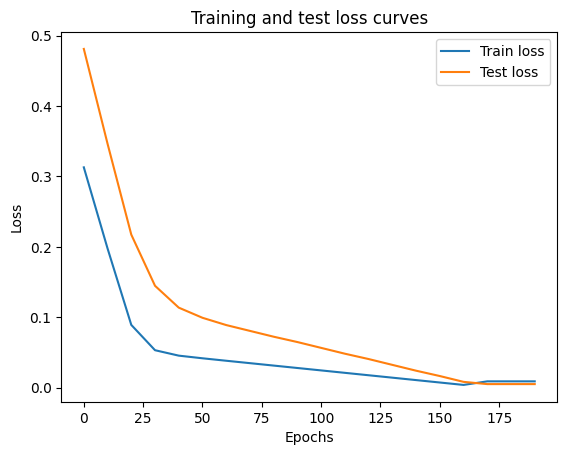

In [29]:
# 我们将上述过程的图像进行可视化呈现
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

太棒了！**损失曲线**显示损失随着时间在下降。记住，损失是衡量你的模型有多*错误*的指标，所以越低越好。

但是为什么损失会下降呢？

嗯，多亏了我们的损失函数和优化器，模型的内部参数（`权重`和`偏置`）得到了更新，以更好地反映数据中的潜在模式。

让我们检查一下模型的[`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/

In [30]:
# 接下来查看我们训练后的模型的参数
print("该模型学习到了以下权重和偏置值:")
print(model_0.state_dict())
print("\n权重和偏置的原始值如下:")
print(f"weights: {weight}, bias: {bias}")

该模型学习到了以下权重和偏置值:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

权重和偏置的原始值如下:
weights: 0.7, bias: 0.3


哇！这太酷了吧？

我们的模型在计算`weight`（权重）和`bias`（偏置）的精确原始值方面已经非常接近了（而且如果我们训练得更久，可能会更接近）。

> **练习：** 试着把上面的`epochs`（轮次）值改成200，看看模型的损失曲线以及权重和偏置参数值会发生什么变化？

它可能永远无法完美地猜到这些值（尤其是在使用更复杂的数据集时），但这也没关系，通常用一个接近的近似值就能做出非常棒的事情。

这就是机器学习和深度学习的核心思想：**存在一些描述我们数据的理想值**，我们不用手动去找出它们，**而是可以训练一个模型，让它通过编程的方式来找出这些值**。

## 4. 使用训练好的PyTorch模型进行预测（推理）

训练好模型后，你可能会想用它来进行预测。

我们在上面的训练和测试代码中已经对此有所了解，在训练/测试循环之外进行预测的步骤与之类似。

使用PyTorch模型进行预测（也称为执行推理）时，要记住三件事：

1. 将模型设置为评估模式（`model.eval()`）。
2. 使用推理模式上下文管理器进行预测（`with torch.inference_mode(): ...`）。
3. 所有预测都应使用同一设备上的对象进行（例如，数据和模型都仅在GPU上，或者数据和模型都仅在CPU上）。

前两项确保PyTorch在训练期间后台使用但推理不需要的所有有用计算和设置都被关闭（这会加快计算速度）。第三项则确保你不会遇到跨设备错误。

In [33]:
# 1. 设置模型为评估模式
model_0.eval()

# 2. 开启推理模型上下文管理器
with torch.inference_mode():
  # 3. 确保针对模型和数据的计算是在同一个设备上
  # 由于前面我们未将数据迁移到GPU上进行训练，因此默认情况下都是在cpu上执行的
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

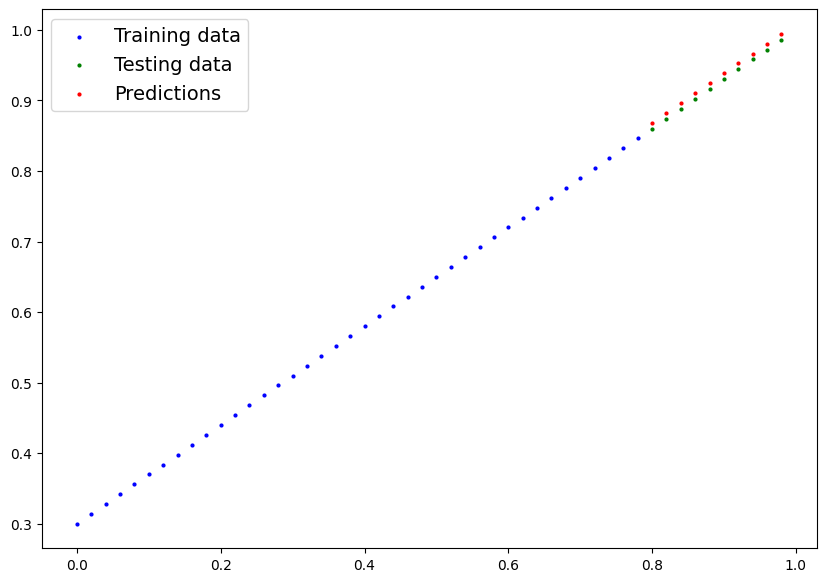

In [35]:
# 再次查看预测效果，可以看到，相比于随即权重下模型的预测结果，这次明显好太多了
plot_predictions(predictions=y_preds)

## 5. 保存和加载 PyTorch 模型

如果你已经训练好了一个 PyTorch 模型，通常你会希望将其保存并导出到其他地方。

比如说，你可能在 Google Colab 或者本地带 GPU 的机器上训练好了模型，但现在想把它导出到某个应用程序中，供其他人使用。

又或者，你可能想保存模型的训练进度，以便之后回来继续加载使用。

在 PyTorch 中保存和加载模型，有三种你需要了解的主要方法（以下所有内容均源自 [PyTorch 模型保存与加载指南](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)）：

| PyTorch 方法 | 功能说明 | 
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | 利用 Python 的 [`pickle`](https://docs.python.org/3/library/pickle.html) 工具，将序列化后的对象保存到磁盘。模型、张量以及字典等各种其他 Python 对象，都可以通过 `torch.save` 进行保存。  | 
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | 借助 `pickle` 的反序列化功能，将已 pickle 处理的 Python 对象文件（如模型、张量或字典）加载到内存中。你还可以指定对象加载到的设备（CPU、GPU 等）。 |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| 通过已保存的 `state_dict()` 对象，加载模型的参数字典（即 `model.state_dict()`）。 | 

> **注意**：正如 [Python 的 `pickle` 文档](https://docs.python.org/3/library/pickle.html) 中所述，`pickle` 模块**并不安全**。这意味着你只应对可信的数据进行反序列化（加载）操作，PyTorch 模型的加载也遵循此原则。请始终只使用来自可信来源的已保存 PyTorch 模型。

### 保存PyTorch模型的`state_dict()`

[推荐的方法](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)是通过保存和加载模型的`state_dict()`来保存和加载用于推理（进行预测）的模型。

让我们看看如何通过几个步骤来实现：

1. 我们将使用Python的`pathlib`模块创建一个名为`models`的目录，用于保存模型。
2. 我们将创建一个文件路径来保存模型。
3. 我们将调用`torch.save(obj, f)`，其中`obj`是目标模型的`state_dict()`，`f`是保存模型的文件名。

> **注意：** PyTorch保存的模型或对象通常以`.pt`或`.pth`结尾，例如`saved_model_01.pth`。

In [38]:
from pathlib import Path
# 1.创建模型文件夹
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# 2. 创建模型保存路径
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. 保存模型的state dict
print(f"保存模型到：{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

保存模型到：models/01_pytorch_workflow_model_0.pth


In [40]:
# 检查模型是否保存成功
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 10月 18 15:10 models/01_pytorch_workflow_model_0.pth


### 加载已保存的 PyTorch 模型 `state_dict()`

既然我们已经在路径 `models/01_pytorch_workflow_model_0.pth` 下保存了模型的 `state_dict()`，现在就可以使用 `torch.nn.Module.load_state_dict(torch.load(f))` 来加载它，其中 `f` 代表已保存模型 `state_dict()` 的文件路径。

为什么要在 `torch.nn.Module.load_state_dict()` 内部调用 `torch.load()` 呢？

因为我们只保存了模型的 `state_dict()`（它本质上是一个包含模型学到的参数的字典），而没有保存**整个模型**。因此，我们需要先通过 `torch.load()` 加载 `state_dict()`，再将加载后的 `state_dict()` 传入一个新创建的模型实例（该实例需是 `nn.Module` 的子类）。

为什么不直接保存整个模型呢？

虽然保存**整个模型**比只保存 `state_dict()` 更直观，但引用 PyTorch 官方文档的表述（斜体为原文强调内容）：

> 这种方法（保存整个模型）的缺点是，序列化后的数据会与保存模型时所用的特定类以及精确的目录结构绑定……
>
> 因此，当你在其他项目中使用这些数据，或者对代码进行重构后，代码可能会以各种方式出现故障。

正因为如此，我们选择更灵活的方式——仅保存和加载 `state_dict()`，它本质上就是一个存储模型参数的字典。

下面我们通过创建 `LinearRegressionModel()` 的另一个实例来测试加载功能。`LinearRegressionModel()` 是 `torch.nn.Module` 的子类，因此会自带 `load_state_dict()` 这个内置方法。

In [41]:
# 实例化我们模型的一个新实例（这将使用随机权重进行实例化）
loaded_model_0 = LinearRegressionModel()

# 加载我们保存的模型的状态字典（这将用训练好的权重更新我们模型的新实例）
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

太棒了！看起来一切都匹配上了。

现在为了测试我们加载的模型，让我们用它在测试数据上进行推理（做出预测）。

还记得使用PyTorch模型进行推理的规则吗？

如果不记得了，这里有个复习：

<details>
    <summary>PyTorch推理规则</summary>
    <ol>
      <li> 将模型设置为评估模式（<code>model.eval()</code>）。</li>
      <li> 使用推理模式上下文管理器进行预测（<code>with torch.inference_mode(): ...</code>）。</

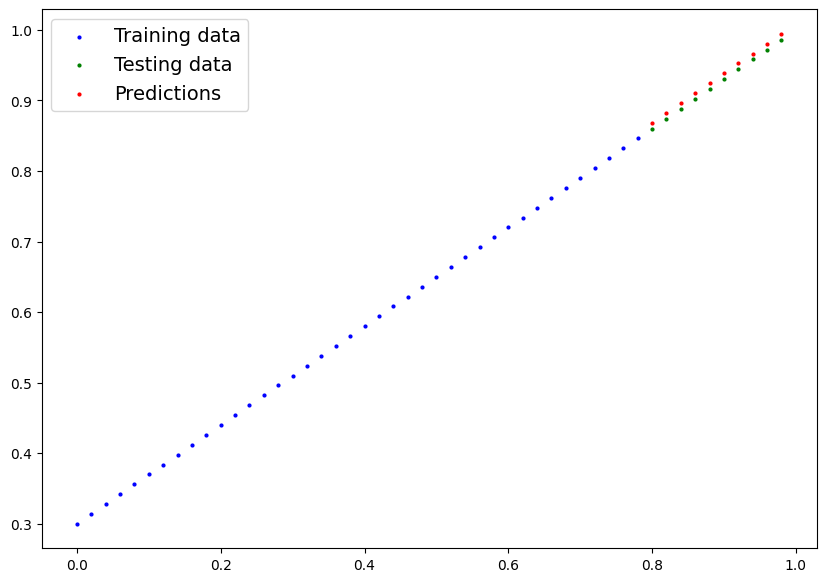

In [45]:
loaded_model_0.eval()
with torch.inference_mode():
    y_pred = loaded_model_0(X_test)
plot_predictions(predictions=y_preds)

    太好了！

看起来加载的模型预测结果与之前的模型预测结果（保存前做出的预测）一致。这表明我们的模型能够按预期进行保存和加载。

> **注意**：保存和加载PyTorch模型还有更多方法，但我会把这些留作拓展内容和进一步阅读。更多信息请参见[PyTorch模型保存和加载指南](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models)。

## 6. 尝试预测一个一元四次函数 $y = 2x^4 + 6x^3 - 10x^2 + 0.7x + 2$

到目前为止，我们已经涵盖了相当多的内容。

但一旦你进行了一些练习，你就会像在街上跳舞一样熟练地执行上述步骤。

说到练习，让我们把到目前为止所做的一切整合起来，并略作修改，尝试去逼近一个一元二次函数。

不过这一次，我们会让我们的代码与设备无关（所以如果有GPU可用，它会使用GPU；如果没有，就默认使用CPU）。

本节的注释会比上面少得多，因为我们将要讨论的内容已经讲过了。

我们将从导入所需的标准库开始。

In [47]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# 检查一下torch版本
torch.__version__

'2.3.1+cu121'

In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"使用的设备：{device}")

使用的设备：cuda


In [95]:
# 创建一个权重和偏置
weights = torch.tensor([0.7, -10, 6, 2]).unsqueeze(dim=0)
bias = torch.tensor(2)
# 创建随机数据
start = 0
end = 1
step = 0.02
# 创建输入和输出
x1 = torch.arange(start, end, step)
x2 = x1**2
x3 = x1**3
x4 = x1**4
X = torch.stack([x1, x2, x3, x4], dim=1)
y = torch.mm(X, weights.T) + bias

In [96]:
# 将数据集划分为训练集和测试集
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

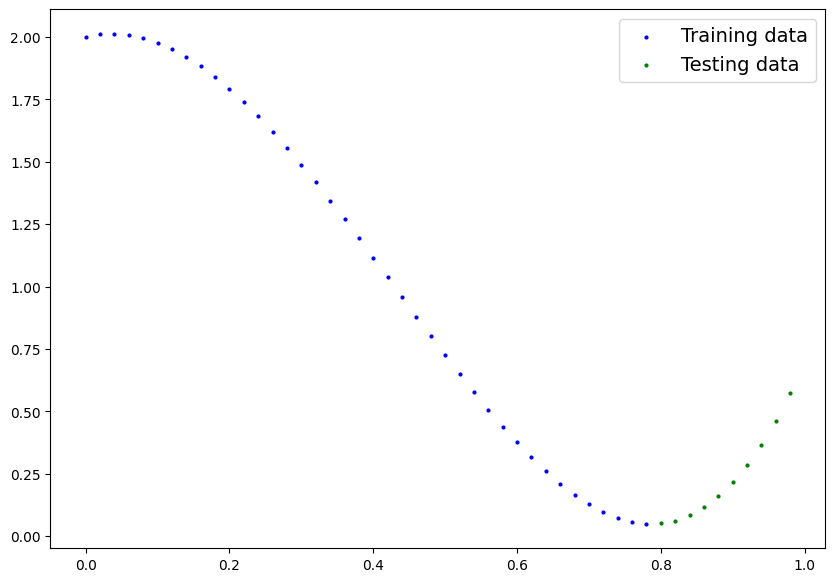

In [97]:
plot_predictions(X_train[:, :1], y_train, X_test[:, :1], y_test)

### 6.2 构建PyTorch线性模型

我们已经有了一些数据，现在是时候构建模型了。

我们将创建与之前风格相同的模型，不过这次，我们不会使用`nn.Parameter()`手动定义模型的权重和偏置参数，而是使用[`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)来自动完成。

其中，`in_features`是输入数据的维度数量，`out_features`是你希望输出数据的维度数量。

在我们的案例中，`in_features`等于4，`out_features`等于1。

In [98]:
# 定义我们新的线性回归模型
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # 使用nn.Linear()用于创建模型的参数
        self.linear_layer = nn.Linear(in_features=4,
                                      out_features=1)
    # 定义前向计算过程
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# 随机初始化权重
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=4, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[ 0.3823,  0.4150, -0.1171,  0.4593]])),
              ('linear_layer.bias', tensor([-0.1096]))]))

注意`model_1.state_dict()`的输出，`nn.Linear()`层为我们创建了随机的`weight`（权重）和`bias`（偏置）参数。

现在让我们将模型放到GPU上（如果有的话）。

我们可以使用`.to(device)`来更改PyTorch对象所在的设备。

首先，让我们检查一下模型当前所在的设备。

In [99]:
# 检查一下现在模型所在的设备
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
是时候构建训练和测试循环了。

首先，我们需要一个损失函数和一个优化器。

让我们使用之前用过的相同函数，即`nn.L1Loss()`和`torch.optim.SGD()`。

我们必须将新模型的参数（`model.parameters()`）传递给优化器，以便它在训练过程中对这些参数进行调整。

之前0.01的学习率效果很好，所以我们再次使用这个学习率。

In [117]:
# 创建一个loss函数
loss_fn = nn.L1Loss()
# 创建一个优化器
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

太棒了，损失函数和优化器已准备就绪，现在让我们通过训练循环和测试循环来训练并评估模型。

与之前的训练循环相比，本步骤中我们唯一要做的不同操作，就是将数据放到目标`device`（设备）上。

我们已经通过`model_1.to(device)`代码，将模型部署到了目标`device`上。

对于数据，我们也可以执行相同的操作。

这样一来，若模型在 GPU 上，数据也会随之在 GPU 上（反之亦然）。

这次我们把难度提升一点，将`epochs`（轮次）设置为 1000。

如果需要回顾 PyTorch 训练循环的步骤，可参考下方内容。

<details>
    <summary>PyTorch 训练循环步骤</summary>
    <ol>
        <li><b>前向传播</b> - 模型完整遍历一次所有训练数据，执行其<code>forward()</code>函数计算（对应代码：<code>model(x_train)</code>）。</li>
        <li><b>计算损失</b> - 将模型的输出结果（预测值）与真实标签（ground truth）进行对比，评估模型预测的误差程度（对应代码：<code>loss = loss_fn(y_pred, y_train)</code>）。</li>
        <li><b>梯度清零</b> - 将优化器的梯度设置为零（默认情况下梯度会累积），以便为当前训练步骤重新计算梯度（对应代码：<code>optimizer.zero_grad()</code>）。</li>
        <li><b>对损失执行反向传播</b> - 计算损失相对于所有待更新模型参数（每个设置了<code>requires_grad=True</code>的参数）的梯度。这一过程被称为<b>反向传播</b>，因此代码中会使用“backward”（对应代码：<code>loss.backward()</code>）。</li>
        <li><b>优化器执行步骤（梯度下降）</b> - 根据损失梯度，更新所有设置了<code>requires_grad=True</code>的参数，以实现模型性能的提升（对应代码：<code>optimizer.step()</code>）。</li>
    </ol>
</details>

### 补充说明
- **device**：在深度学习中通常指计算设备，主要包括 CPU（中央处理器）和 GPU（图形处理器），GPU 因并行计算能力强，常用于加速模型训练。
- **epochs**：指模型完整遍历训练数据集的次数，设置合适的轮次可在避免过拟合的同时提升模型性能，1000 轮属于较多轮次的训练设置，需结合具体任务调整。
- 代码片段保留了 PyTorch 框架的原生语法（如`model.to(device)`、`loss.backward()`），确保开发者可直接对应到实际编程场景。

In [118]:
torch.manual_seed(42)
# 设置轮次
epochs = 300000
# 将训练数据，测试数据全部都移到device上
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [119]:
for epoch in range(epochs):
    # 训练阶段
    model_1.train()
    # 1. 前向传播
    y_pred = model_1(X_train)
    # 2. 计算loss
    loss = loss_fn(y_pred, y_train)
    # 3. 梯度清零
    optimizer.zero_grad()
    # 4. 反向传播
    loss.backward()
    # 5. 梯度下降
    optimizer.step()
    # 测试阶段
    model_1.eval()
    with torch.inference_mode():
        # 1. 前向传播
        test_pred = model_1(X_test)
        # 2. 计算loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10000 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.004515850450843573 | Test loss: 0.09366702288389206
Epoch: 10000 | Train loss: 0.004443389363586903 | Test loss: 0.09324117749929428
Epoch: 20000 | Train loss: 0.00443902937695384 | Test loss: 0.09294426441192627
Epoch: 30000 | Train loss: 0.004434478469192982 | Test loss: 0.09261851757764816
Epoch: 40000 | Train loss: 0.004426151514053345 | Test loss: 0.09236186742782593
Epoch: 50000 | Train loss: 0.0044224741868674755 | Test loss: 0.092117540538311
Epoch: 60000 | Train loss: 0.004414588212966919 | Test loss: 0.0919097289443016
Epoch: 70000 | Train loss: 0.0044085681438446045 | Test loss: 0.0917256698012352
Epoch: 80000 | Train loss: 0.004406023304909468 | Test loss: 0.09159457683563232
Epoch: 90000 | Train loss: 0.004396406002342701 | Test loss: 0.09144514799118042
Epoch: 100000 | Train loss: 0.0043904781341552734 | Test loss: 0.0914197787642479
Epoch: 110000 | Train loss: 0.004387077875435352 | Test loss: 0.09125158935785294
Epoch: 120000 | Train loss: 0.004

### 6.4 进行预测

现在我们已经有了一个训练好的模型，让我们开启它的评估模式并进行一些预测。

In [120]:
# 将模式设置为评估模式
model_1.eval()

# 在测试集上进行预测
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.0718],
        [0.0920],
        [0.1244],
        [0.1698],
        [0.2291],
        [0.3031],
        [0.3927],
        [0.4987],
        [0.6222],
        [0.7639]], device='cuda:0')

如果你使用GPU上的数据进行预测，可能会注意到上述输出的末尾有`device='cuda:0'`。这意味着数据位于CUDA设备0上（由于采用零索引，这是你的系统可访问的第一个GPU），如果你将来使用多个GPU，这个数字可能会更大。

现在让我们绘制模型的预测结果。

> **注意：** 许多数据科学库（如pandas、matplotlib和NumPy）无法使用存储在GPU上的数据。因此，当你尝试将这些库中的函数用于未存储在CPU上的张量数据时，可能会遇到一些问题。要解决此问题，你可以对目标张量调用[`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html)，以返回目标张量在CPU上的副本。

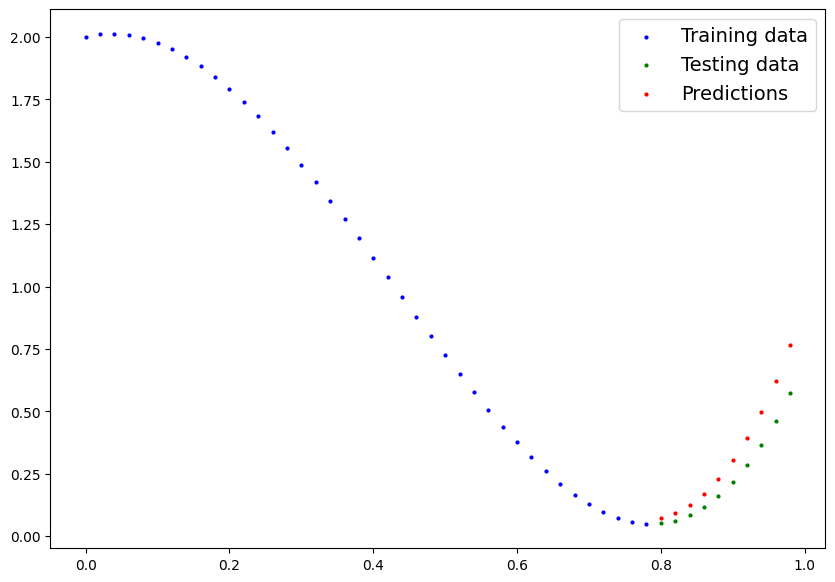

In [121]:
plot_predictions(X_train[:, :1].cpu(), y_train.cpu(), X_test[:, :1].cpu(), y_test.cpu(), predictions=y_preds.cpu())

### 6.5 保存和加载模型

我们对模型的预测结果很满意，所以让我们把它保存到文件中，以便日后使用。

In [122]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


为了确保一切运行正常，让我们把它重新加载进来。

我们会：
* 创建`LinearRegressionModelV2()`类的一个新实例
* 使用`torch.nn.Module.load_state_dict()`加载模型状态字典
* 将模型的新实例发送到目标设备（以确保我们的代码与设备无关）

In [123]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=4, out_features=1, bias=True)
)
Model on device:
cuda:0


现在我们可以评估加载的模型，看看它的预测结果是否与保存前的预测结果一致。

In [124]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')